In [1]:
import pickle
import numpy as np

# Load one of your processed samples
with open('processed_samples_1980.pkl', 'rb') as f:
    samples = pickle.load(f)

sample = samples[0]  # Look at first sample

print("Input trajectory shape:", sample['input_trajectory'].shape)
print("Number of environmental timesteps:", len(sample['environmental_data']))
print("\nOne environmental data point contains:")
for key in sample['environmental_data'][0].keys():
    if key == 'wind':
        print(f"  wind fields: {list(sample['environmental_data'][0]['wind'].keys())}")
        print(f"    u_300 shape: {sample['environmental_data'][0]['wind']['u_300'].shape}")
    elif key == 'sst':
        print(f"  sst shape: {sample['environmental_data'][0]['sst'].shape}")
    elif key == 'geopotential':
        print(f"  geopotential shape: {sample['environmental_data'][0]['geopotential'].shape}")

Input trajectory shape: (8, 6)
Number of environmental timesteps: 8

One environmental data point contains:
  wind fields: ['u_300', 'v_300', 'u_500', 'v_500', 'u_700', 'v_700', 'u_850', 'v_850']
    u_300 shape: (21, 21)
  sst shape: (21, 21)
  geopotential shape: (21, 41)


In [2]:
import pickle
import numpy as np

# Load one of your processed samples
with open('processed_samples_1981.pkl', 'rb') as f:
    samples = pickle.load(f)

sample = samples[0]  # Look at first sample

print("Input trajectory shape:", sample['input_trajectory'].shape)
print("Number of environmental timesteps:", len(sample['environmental_data']))
print("\nOne environmental data point contains:")
for key in sample['environmental_data'][0].keys():
    if key == 'wind':
        print(f"  wind fields: {list(sample['environmental_data'][0]['wind'].keys())}")
        print(f"    u_300 shape: {sample['environmental_data'][0]['wind']['u_300'].shape}")
    elif key == 'sst':
        print(f"  sst shape: {sample['environmental_data'][0]['sst'].shape}")
    elif key == 'geopotential':
        print(f"  geopotential shape: {sample['environmental_data'][0]['geopotential'].shape}")

Input trajectory shape: (8, 6)
Number of environmental timesteps: 8

One environmental data point contains:
  wind fields: ['u_300', 'v_300', 'u_500', 'v_500', 'u_700', 'v_700', 'u_850', 'v_850']
    u_300 shape: (21, 21)
  sst shape: (21, 21)
  geopotential shape: (21, 41)


In [4]:
import pickle
import numpy as np

# Load your processed data
with open('processed_samples_1980.pkl', 'rb') as f:
    samples_1980 = pickle.load(f)

sample = samples_1980[0]

print("="*70)
print("SAMPLE OVERVIEW")
print("="*70)
print(f"Cyclone: {sample['cyclone_name']}")
print(f"Current time: {sample['current_time']}")
print(f"Current position: {sample['current_position']}")
print()

# Check trajectory
print("="*70)
print("TRAJECTORY DATA")
print("="*70)
traj = sample['input_trajectory']
print(f"Shape: {traj.shape}")
print(f"Columns: [lat, lon, ws, p, speed, direct]")
print(f"\nFirst timestep: {traj[0]}")
print(f"Last timestep: {traj[-1]}")
print(f"\nLatitude range: {traj[:, 0].min():.1f}° to {traj[:, 0].max():.1f}°")
print(f"Longitude range: {traj[:, 1].min():.1f}° to {traj[:, 1].max():.1f}°")
print(f"Wind speed range: {traj[:, 2].min():.1f} to {traj[:, 2].max():.1f} m/s")
print(f"Pressure range: {traj[:, 3].min():.1f} to {traj[:, 3].max():.1f} hPa")
print()

# Check environmental data for first timestep
print("="*70)
print("ERA5 ENVIRONMENTAL DATA (First Timestep)")
print("="*70)
env = sample['environmental_data'][0]

print(f"Position used: {env['position']}")
print(f"Timestamp: {env['actual_time']}")
print()

# Wind fields
print("Wind fields (u and v components):")
for level in [300, 500, 700, 850]:
    u = env['wind'][f'u_{level}']
    v = env['wind'][f'v_{level}']
    print(f"  {level} hPa: shape {u.shape}")
    print(f"    u-wind: min={u.min():.2f}, max={u.max():.2f}, mean={u.mean():.2f}")
    print(f"    v-wind: min={v.min():.2f}, max={v.max():.2f}, mean={v.mean():.2f}")

# SST
sst = env['sst']
print(f"\nSST: shape {sst.shape}")
print(f"  min={sst.min():.2f}, max={sst.max():.2f}, mean={sst.mean():.2f}")

# Geopotential
geo = env['geopotential']
print(f"\nGeopotential (500 hPa): shape {geo.shape}")
print(f"  min={geo.min():.2f}, max={geo.max():.2f}, mean={geo.mean():.2f}")

# Check targets
print()
print("="*70)
print("FORECAST TARGETS")
print("="*70)
for fh in [6, 12, 24, 48, 72]:
    target = sample['targets'][f't+{fh}h']
    if target:
        print(f"t+{fh}h: lat={target['lat']:.2f}°, lon={target['lon']:.2f}°, ws={target['ws']:.1f} m/s")
    else:
        print(f"t+{fh}h: NO DATA")

SAMPLE OVERVIEW
Cyclone: NOT_NAMED
Current time: 1980-03-22 12:00:00.000040448
Current position: (10.800001, 128.699997)

TRAJECTORY DATA
Shape: (8, 6)
Columns: [lat, lon, ws, p, speed, direct]

First timestep: [   9.684408  131.640091   25.       1000.         14.        295.      ]
Last timestep: [  10.800001  128.699997   25.       1002.          6.        286.      ]

Latitude range: 9.7° to 10.8°
Longitude range: 128.7° to 131.6°
Wind speed range: 25.0 to 25.0 m/s
Pressure range: 1000.0 to 1002.0 hPa

ERA5 ENVIRONMENTAL DATA (First Timestep)
Position used: (10, 132)
Timestamp: 1980-03-21 15:00:00.000040448

Wind fields (u and v components):
  300 hPa: shape (21, 21)
    u-wind: min=-20.69, max=13.03, mean=-9.06
    v-wind: min=-6.95, max=10.97, mean=1.44
  500 hPa: shape (21, 21)
    u-wind: min=-17.77, max=12.31, mean=0.08
    v-wind: min=-8.33, max=8.23, mean=1.46
  700 hPa: shape (21, 21)
    u-wind: min=-16.83, max=13.09, mean=-1.06
    v-wind: min=-13.41, max=10.81, mean=0.61

In [6]:
print(samples_1980[1])

{'input_trajectory': array([[   9.994227,  131.006866,   25.      , 1000.      ,   13.      ,
         294.      ],
       [  10.215878,  130.415359,   25.      , 1000.      ,   11.      ,
         290.      ],
       [  10.38    ,  129.920013,   25.      , 1000.      ,    9.      ,
         288.      ],
       [  10.487336,  129.5728  ,   25.      , 1001.      ,    6.      ,
         288.      ],
       [  10.5748  ,  129.295868,   25.      , 1002.      ,    6.      ,
         290.      ],
       [  10.690733,  128.998428,   25.      , 1002.      ,    6.      ,
         291.      ],
       [  10.800001,  128.699997,   25.      , 1002.      ,    6.      ,
         286.      ],
       [  10.866302,  128.394058,   25.      , 1002.      ,    6.      ,
         282.      ]]), 'environmental_data': [{'wind': {'u_300': array([[ -9.753418  , -10.007324  , -10.272949  , -10.63623   ,
        -11.312012  , -11.499512  , -12.026855  , -12.714355  ,
        -13.085449  , -11.788574  , -10.51123  

In [7]:
# Check a few samples to see if SST is always NaN
print("Checking SST across multiple samples:\n")
for i in range(min(5, len(samples_1980))):
    sample = samples_1980[i]
    sst = sample['environmental_data'][0]['sst']
    has_data = not np.all(np.isnan(sst))
    print(f"Sample {i}: {sample['cyclone_name']}")
    print(f"  Position: {sample['current_position']}")
    print(f"  Rounded: ({round(sample['current_position'][0])}, {round(sample['current_position'][1])})")
    print(f"  SST has valid data: {has_data}")
    if has_data:
        print(f"    SST range: {np.nanmin(sst):.2f} to {np.nanmax(sst):.2f}")
    print()

Checking SST across multiple samples:

Sample 0: NOT_NAMED
  Position: (10.800001, 128.699997)
  Rounded: (11, 129)
  SST has valid data: True
    SST range: 298.06 to 302.68

Sample 1: NOT_NAMED
  Position: (10.866302, 128.394058)
  Rounded: (11, 128)
  SST has valid data: True
    SST range: 298.06 to 302.68

Sample 2: NOT_NAMED
  Position: (10.930922, 128.090363)
  Rounded: (11, 128)
  SST has valid data: True
    SST range: 298.06 to 302.68

Sample 3: NOT_NAMED
  Position: (11.028006, 127.795914)
  Rounded: (11, 128)
  SST has valid data: True
    SST range: 297.96 to 302.80

Sample 4: NOT_NAMED
  Position: (11.16, 127.480003)
  Rounded: (11, 127)
  SST has valid data: True
    SST range: 297.96 to 302.80



# Trying DIFFUSION 

In [9]:
"""
Diffusion Transformer for Tropical Cyclone Track Forecasting
==============================================================

Simplified implementation using pooled ERA5 features.
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math


class SinusoidalPositionEmbedding(nn.Module):
    """Timestep embedding for diffusion process."""
    
    def __init__(self, dim):
        super().__init__()
        self.dim = dim
    
    def forward(self, t):
        device = t.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = t[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        return embeddings


class ERA5Pooler(nn.Module):
    """Pool ERA5 spatial grids into fixed-size vectors."""
    
    def __init__(self):
        super().__init__()
        # We'll just use spatial averaging - simple but effective!
    
    def forward(self, env_data_batch):
        """
        Args:
            env_data_batch: List of environmental data dicts
        
        Returns:
            Tensor of shape (batch, n_timesteps, 10)
            where 10 = 8 wind fields + 1 SST + 1 geopotential
        """
        batch_features = []
        
        for env_timesteps in env_data_batch:  # Each sample
            timestep_features = []
            
            for env in env_timesteps:  # Each of 8 timesteps
                features = []
                
                # Pool wind fields (8 fields: u and v at 4 levels)
                for level in [300, 500, 700, 850]:
                    u = env['wind'][f'u_{level}']
                    v = env['wind'][f'v_{level}']
                    features.append(np.nanmean(u))
                    features.append(np.nanmean(v))
                
                # Pool SST
                features.append(np.nanmean(env['sst']))
                
                # Pool geopotential
                features.append(np.nanmean(env['geopotential']))
                
                timestep_features.append(features)
            
            batch_features.append(timestep_features)
        
        return torch.FloatTensor(batch_features)  # (batch, 8, 10)


class DiffusionTransformer(nn.Module):
    """
    Diffusion Transformer for storm track forecasting.
    
    Conditions on past trajectory and ERA5 data to denoise future positions.
    """
    
    def __init__(
        self,
        d_model=256,
        n_heads=8,
        n_layers=6,
        dropout=0.1,
        max_diffusion_steps=1000
    ):
        super().__init__()
        
        self.d_model = d_model
        
        # Embeddings for different input types
        self.traj_embed = nn.Linear(6, d_model)  # (lat, lon, ws, p, speed, dir)
        self.era5_embed = nn.Linear(10, d_model)  # 10 pooled features
        self.pos_embed = nn.Linear(2, d_model)  # (lat, lon) to predict
        
        # Diffusion timestep embedding
        self.time_embed = nn.Sequential(
            SinusoidalPositionEmbedding(d_model),
            nn.Linear(d_model, d_model * 4),
            nn.GELU(),
            nn.Linear(d_model * 4, d_model)
        )
        
        # Transformer encoder for conditioning (past trajectory + ERA5)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=d_model * 4,
            dropout=dropout,
            batch_first=True
        )
        self.condition_encoder = nn.TransformerEncoder(encoder_layer, n_layers)
        
        # Transformer decoder for denoising (cross-attends to conditioning)
        decoder_layer = nn.TransformerDecoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=d_model * 4,
            dropout=dropout,
            batch_first=True
        )
        self.denoiser = nn.TransformerDecoder(decoder_layer, n_layers)
        
        # Output head (predict noise for each position)
        self.output_head = nn.Linear(d_model, 2)  # → (lat_noise, lon_noise)
        
        # Learnable positional encoding for forecast horizons
        self.forecast_pos_embed = nn.Parameter(torch.randn(5, d_model))
    
    def forward(self, past_traj, era5_features, noisy_positions, diffusion_t):
        """
        Args:
            past_traj: (batch, 8, 6) - past 24h trajectory
            era5_features: (batch, 8, 10) - pooled ERA5 at each timestep
            noisy_positions: (batch, 5, 2) - noisy future positions (lat, lon)
            diffusion_t: (batch,) - current diffusion timestep
        
        Returns:
            predicted_noise: (batch, 5, 2) - noise to remove
        """
        batch_size = past_traj.shape[0]
        
        # Embed conditioning information
        traj_tokens = self.traj_embed(past_traj)  # (batch, 8, d_model)
        era5_tokens = self.era5_embed(era5_features)  # (batch, 8, d_model)
        
        # Concatenate trajectory and ERA5 as conditioning sequence
        conditioning = torch.cat([traj_tokens, era5_tokens], dim=1)  # (batch, 16, d_model)
        
        # Encode conditioning
        conditioning = self.condition_encoder(conditioning)  # (batch, 16, d_model)
        
        # Embed noisy positions
        pos_tokens = self.pos_embed(noisy_positions)  # (batch, 5, d_model)
        
        # Add forecast horizon positional encoding
        pos_tokens = pos_tokens + self.forecast_pos_embed.unsqueeze(0)
        
        # Add diffusion timestep information
        t_embed = self.time_embed(diffusion_t)  # (batch, d_model)
        pos_tokens = pos_tokens + t_embed.unsqueeze(1)  # Broadcast to all positions
        
        # Denoise via cross-attention to conditioning
        denoised = self.denoiser(pos_tokens, conditioning)  # (batch, 5, d_model)
        
        # Predict noise
        predicted_noise = self.output_head(denoised)  # (batch, 5, 2)
        
        return predicted_noise

In [10]:
class GaussianDiffusion:
    """
    Simplified DDPM for storm track forecasting.
    """
    
    def __init__(self, timesteps=1000, beta_start=0.0001, beta_end=0.02):
        self.timesteps = timesteps
        
        # Linear beta schedule
        self.betas = torch.linspace(beta_start, beta_end, timesteps)
        self.alphas = 1.0 - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)
        self.alphas_cumprod_prev = F.pad(self.alphas_cumprod[:-1], (1, 0), value=1.0)
        
        # Calculations for diffusion q(x_t | x_{t-1})
        self.sqrt_alphas_cumprod = torch.sqrt(self.alphas_cumprod)
        self.sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - self.alphas_cumprod)
        
        # Calculations for posterior q(x_{t-1} | x_t, x_0)
        self.posterior_variance = (
            self.betas * (1.0 - self.alphas_cumprod_prev) / (1.0 - self.alphas_cumprod)
        )
    
    def q_sample(self, x_start, t, noise=None):
        """
        Forward diffusion: add noise to clean data.
        
        Args:
            x_start: (batch, 5, 2) - clean future positions
            t: (batch,) - diffusion timestep
            noise: optional noise to add
        
        Returns:
            x_t: noisy version of x_start at timestep t
        """
        if noise is None:
            noise = torch.randn_like(x_start)
        
        sqrt_alpha = self.sqrt_alphas_cumprod[t]
        sqrt_one_minus_alpha = self.sqrt_one_minus_alphas_cumprod[t]
        
        # Reshape for broadcasting
        sqrt_alpha = sqrt_alpha[:, None, None]
        sqrt_one_minus_alpha = sqrt_one_minus_alpha[:, None, None]
        
        return sqrt_alpha * x_start + sqrt_one_minus_alpha * noise
    
    def p_sample(self, model, x_t, t, past_traj, era5_features):
        """
        Reverse diffusion: denoise one step.
        
        Args:
            model: DiffusionTransformer
            x_t: (batch, 5, 2) - noisy positions at timestep t
            t: (batch,) - current timestep
            past_traj: (batch, 8, 6) - conditioning
            era5_features: (batch, 8, 10) - conditioning
        
        Returns:
            x_{t-1}: less noisy positions
        """
        # Predict noise
        predicted_noise = model(past_traj, era5_features, x_t, t)
        
        # Calculate x_0 prediction
        alpha = self.alphas_cumprod[t][:, None, None]
        alpha_prev = self.alphas_cumprod_prev[t][:, None, None]
        beta = self.betas[t][:, None, None]
        
        # Predict x_0
        pred_x0 = (x_t - torch.sqrt(1 - alpha) * predicted_noise) / torch.sqrt(alpha)
        
        # Calculate x_{t-1}
        mean = (
            torch.sqrt(alpha_prev) * beta * pred_x0 +
            torch.sqrt(self.alphas[t][:, None, None]) * (1 - alpha_prev) * x_t
        ) / (1 - alpha)
        
        if t[0] > 0:
            noise = torch.randn_like(x_t)
            variance = self.posterior_variance[t][:, None, None]
            return mean + torch.sqrt(variance) * noise
        else:
            return mean
    
    @torch.no_grad()
    def sample(self, model, past_traj, era5_features, device):
        """
        Generate storm track by denoising from pure noise.
        
        Args:
            model: trained DiffusionTransformer
            past_traj: (batch, 8, 6)
            era5_features: (batch, 8, 10)
        
        Returns:
            predicted_track: (batch, 5, 2) - forecasted positions
        """
        batch_size = past_traj.shape[0]
        
        # Start from pure noise
        x = torch.randn(batch_size, 5, 2, device=device)
        
        # Iteratively denoise
        for i in reversed(range(self.timesteps)):
            t = torch.full((batch_size,), i, device=device, dtype=torch.long)
            x = self.p_sample(model, x, t, past_traj, era5_features)
        
        return x

### Example walkthrough

In [12]:
import torch
import numpy as np

# ============================================================================
# STEP 1: Load one real sample from your data
# ============================================================================

sample = samples_1980[3]  # The "NOT_NAMED" storm from earlier

print("="*70)
print("STEP 1: RAW INPUT DATA")
print("="*70)
print(f"Storm: {sample['cyclone_name']}")
print(f"Current time: {sample['current_time']}")
print(f"Current position: {sample['current_position']}")
print()

# Past trajectory (what we're conditioning on)
past_traj = sample['input_trajectory']
print(f"Past trajectory shape: {past_traj.shape}")
print(f"  → 8 timesteps (24h history at 3h intervals)")
print(f"  → 6 features: [lat, lon, wind_speed, pressure, speed, direction]")
print(f"\nFirst timestep: {past_traj[0]}")
print(f"Last timestep (current): {past_traj[-1]}")
print()

# Environmental data (ERA5 fields around the storm)
env_data = sample['environmental_data']
print(f"Environmental data: {len(env_data)} timesteps")
print(f"At each timestep we have:")
print(f"  - 8 wind fields (u,v at 4 pressure levels): each (21, 21)")
print(f"  - 1 SST field: (21, 21)")
print(f"  - 1 geopotential field: (21, 41)")
print()

# Target positions (what we want to predict)
targets = sample['targets']
print(f"Target future positions:")
for fh in [6, 12, 24, 48, 72]:
    t = targets[f't+{fh}h']
    if t:
        print(f"  t+{fh}h: ({t['lat']:.2f}°N, {t['lon']:.2f}°E)")

print("\n" + "="*70)
print("STEP 2: POOL ERA5 FEATURES")
print("="*70)

# Pool the ERA5 spatial grids into vectors
era5_pooler = ERA5Pooler()
era5_features = era5_pooler([env_data])  # Wrap in list for batch dimension

print(f"Input: 8 timesteps of spatial grids")
print(f"Output shape: {era5_features.shape}")
print(f"  → (1 batch, 8 timesteps, 10 features)")
print(f"\nWhat are these 10 features?")
print(f"  [0-1]: u_300, v_300 (winds at 300 hPa)")
print(f"  [2-3]: u_500, v_500")
print(f"  [4-5]: u_700, v_700")
print(f"  [6-7]: u_850, v_850")
print(f"  [8]: SST (sea surface temperature)")
print(f"  [9]: geopotential at 500 hPa")
print(f"\nFirst timestep pooled features: {era5_features[0, 0]}")

print("\n" + "="*70)
print("STEP 3: PREPARE TRAINING DATA")
print("="*70)

# Convert trajectory to tensor
past_traj_tensor = torch.FloatTensor(past_traj).unsqueeze(0)  # Add batch dim
print(f"Past trajectory: {past_traj_tensor.shape}")
print(f"  → (1 batch, 8 timesteps, 6 features)")

# Create target positions tensor (what we want to predict)
target_positions = []
for fh in [6, 12, 24, 48, 72]:
    t = targets[f't+{fh}h']
    target_positions.append([t['lat'], t['lon']])
target_positions = torch.FloatTensor(target_positions).unsqueeze(0)
print(f"\nClean target positions: {target_positions.shape}")
print(f"  → (1 batch, 5 forecast horizons, 2 coords)")
print(f"Actual values:\n{target_positions[0]}")

print("\n" + "="*70)
print("STEP 4: SIMULATE DIFFUSION FORWARD PROCESS")
print("="*70)

# Create diffusion process
diffusion = GaussianDiffusion(timesteps=1000)

# Pick a random diffusion timestep for training
t = torch.randint(0, 1000, (1,))
print(f"Random diffusion timestep: t = {t.item()}")

# Add noise to target positions
noise = torch.randn_like(target_positions)
noisy_positions = diffusion.q_sample(target_positions, t, noise=noise)

print(f"\nClean positions:\n{target_positions[0]}")
print(f"\nNoise added:\n{noise[0]}")
print(f"\nNoisy positions at t={t.item()}:\n{noisy_positions[0]}")
print(f"\n→ The model's job: given noisy_positions, predict the noise that was added")

STEP 1: RAW INPUT DATA
Storm: NOT_NAMED
Current time: 1980-03-22 21:00:00.000040448
Current position: (11.028006, 127.795914)

Past trajectory shape: (8, 6)
  → 8 timesteps (24h history at 3h intervals)
  → 6 features: [lat, lon, wind_speed, pressure, speed, direction]

First timestep: [  10.38      129.920013   25.       1000.          9.        288.      ]
Last timestep (current): [  11.028006  127.795914   27.       1002.          6.        291.      ]

Environmental data: 8 timesteps
At each timestep we have:
  - 8 wind fields (u,v at 4 pressure levels): each (21, 21)
  - 1 SST field: (21, 21)
  - 1 geopotential field: (21, 41)

Target future positions:
  t+6h: (11.33°N, 127.13°E)
  t+12h: (11.72°N, 126.28°E)
  t+24h: (12.57°N, 124.29°E)
  t+48h: (13.70°N, 120.88°E)
  t+72h: (12.88°N, 118.23°E)

STEP 2: POOL ERA5 FEATURES
Input: 8 timesteps of spatial grids
Output shape: torch.Size([1, 8, 10])
  → (1 batch, 8 timesteps, 10 features)

What are these 10 features?
  [0-1]: u_300, v_30

In [13]:
print("="*70)
print("NOISE AT DIFFERENT DIFFUSION TIMESTEPS")
print("="*70)

clean_pos = target_positions[0, 0]  # Just look at the 6h forecast
print(f"Clean position (t+6h): lat={clean_pos[0]:.2f}°, lon={clean_pos[1]:.2f}°")
print()

for t_val in [0, 250, 500, 750, 999]:
    t = torch.tensor([t_val])
    noisy = diffusion.q_sample(target_positions[:, 0:1, :], t)  # Just 6h forecast
    print(f"t={t_val:3d}: lat={noisy[0,0,0]:.2f}°, lon={noisy[0,0,1]:.2f}°")

print()
print("Notice:")
print("  - At t=0: barely any noise (close to clean)")
print("  - At t=999: completely random (no resemblance to clean)")

NOISE AT DIFFERENT DIFFUSION TIMESTEPS
Clean position (t+6h): lat=11.33°, lon=127.13°

t=  0: lat=11.33°, lon=127.12°
t=250: lat=7.56°, lon=91.80°
t=500: lat=3.53°, lon=37.45°
t=750: lat=1.18°, lon=7.41°
t=999: lat=-1.51°, lon=2.14°

Notice:
  - At t=0: barely any noise (close to clean)
  - At t=999: completely random (no resemblance to clean)


In [14]:
print("="*70)
print("STEP 5: FORWARD PASS THROUGH THE MODEL")
print("="*70)

# Create model
model = DiffusionTransformer(d_model=256, n_heads=8, n_layers=6)
model.eval()  # Evaluation mode for this demo

# Pick a diffusion timestep
t = torch.tensor([500])  # Middle of diffusion process
noisy_positions = diffusion.q_sample(target_positions, t)

print(f"Inputs to model:")
print(f"  past_traj: {past_traj_tensor.shape} = (batch=1, storm_steps=8, features=6)")
print(f"  era5_features: {era5_features.shape} = (batch=1, storm_steps=8, pooled=10)")
print(f"  noisy_positions: {noisy_positions.shape} = (batch=1, forecasts=5, coords=2)")
print(f"  diffusion_t: {t.shape} = (batch=1,) with value t={t.item()}")
print()

# Forward pass
with torch.no_grad():
    predicted_noise = model(past_traj_tensor, era5_features, noisy_positions, t)

print(f"Output from model:")
print(f"  predicted_noise: {predicted_noise.shape} = (batch=1, forecasts=5, coords=2)")
print()

# The model predicts the noise that was added!
print("What the model predicted (noise):")
print(predicted_noise[0])
print()
print("What the actual noise was:")
print(noise[0])
print()
print("→ During training, we minimize: ||predicted_noise - actual_noise||²")

STEP 5: FORWARD PASS THROUGH THE MODEL
Inputs to model:
  past_traj: torch.Size([1, 8, 6]) = (batch=1, storm_steps=8, features=6)
  era5_features: torch.Size([1, 8, 10]) = (batch=1, storm_steps=8, pooled=10)
  noisy_positions: torch.Size([1, 5, 2]) = (batch=1, forecasts=5, coords=2)
  diffusion_t: torch.Size([1]) = (batch=1,) with value t=500

Output from model:
  predicted_noise: torch.Size([1, 5, 2]) = (batch=1, forecasts=5, coords=2)

What the model predicted (noise):
tensor([[-0.3871, -0.7989],
        [-0.3898, -0.7981],
        [-0.3879, -0.8011],
        [-0.3854, -0.8102],
        [-0.3863, -0.8010]])

What the actual noise was:
tensor([[-1.7052, -0.3925],
        [-0.1064, -1.0537],
        [-0.5823, -0.8906],
        [-0.1214,  0.7512],
        [-1.0309, -0.7935]])

→ During training, we minimize: ||predicted_noise - actual_noise||²


In [15]:
print("="*70)
print("STEP 6: SAMPLING (GENERATING A FORECAST)")
print("="*70)

print("Starting from pure noise, we iteratively denoise to get a forecast...")
print()

# We'll just do a few timesteps to illustrate (not all 1000)
diffusion_short = GaussianDiffusion(timesteps=10)  # Just 10 steps for demo

# Start from pure noise
x = torch.randn(1, 5, 2)
print(f"t=10 (start): Pure noise")
print(x[0])
print()

model.eval()
with torch.no_grad():
    for i in reversed(range(10)):
        t = torch.full((1,), i, dtype=torch.long)
        
        # Predict noise
        pred_noise = model(past_traj_tensor, era5_features, x, t)
        
        # Remove some noise
        x = diffusion_short.p_sample(model, x, t, past_traj_tensor, era5_features)
        
        if i % 3 == 0:  # Print every 3 steps
            print(f"t={i}: After denoising")
            print(x[0])
            print()

print("="*70)
print("FINAL FORECAST:")
print("="*70)
print("Predicted positions:")
for idx, fh in enumerate([6, 12, 24, 48, 72]):
    pred_lat, pred_lon = x[0, idx]
    actual_lat, actual_lon = target_positions[0, idx]
    print(f"t+{fh}h: Predicted=({pred_lat:.2f}°, {pred_lon:.2f}°), Actual=({actual_lat:.2f}°, {actual_lon:.2f}°)")

STEP 6: SAMPLING (GENERATING A FORECAST)
Starting from pure noise, we iteratively denoise to get a forecast...

t=10 (start): Pure noise
tensor([[-1.1736, -2.8962],
        [ 1.4639, -0.6219],
        [ 0.8617, -0.7465],
        [-1.1636, -0.7113],
        [ 0.5955,  1.7295]])

t=9: After denoising
tensor([[-1.1867, -2.8551],
        [ 1.6414, -0.6549],
        [ 1.0614, -0.8101],
        [-1.0944, -0.6599],
        [ 0.8840,  1.7760]])

t=6: After denoising
tensor([[-1.1078, -2.8854],
        [ 1.6608, -0.6353],
        [ 1.4351, -0.8214],
        [-1.1553, -0.7302],
        [ 0.7856,  1.8943]])

t=3: After denoising
tensor([[-0.9498, -2.9624],
        [ 1.6398, -0.6999],
        [ 1.6955, -0.5778],
        [-1.0152, -0.6531],
        [ 0.8015,  1.8774]])

t=0: After denoising
tensor([[-0.8665, -2.9478],
        [ 1.7084, -0.6517],
        [ 1.7660, -0.4624],
        [-0.9267, -0.5443],
        [ 0.8442,  1.9715]])

FINAL FORECAST:
Predicted positions:
t+6h: Predicted=(-0.87°, -2.95°)

## Training TRY 1

In [ ]:
"""
Training script for Diffusion Transformer
"""

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pickle
from pathlib import Path

# ============================================================================
# DATASET
# ============================================================================

class StormDataset(Dataset):
    """Dataset for loading processed storm samples."""
    
    def __init__(self, pkl_file):
        with open(pkl_file, 'rb') as f:
            self.samples = pickle.load(f)
        
        self.era5_pooler = ERA5Pooler()
        
        # Filter out samples without all targets
        self.samples = [
            s for s in self.samples 
            if all(s['targets'][f't+{fh}h'] is not None for fh in [6, 12, 24, 48, 72])
        ]
        
        print(f"Loaded {len(self.samples)} valid samples")
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        sample = self.samples[idx]
        
        # Past trajectory
        traj = torch.FloatTensor(sample['input_trajectory'])
        
        # ERA5 features (pool spatial grids)
        era5 = self.era5_pooler([sample['environmental_data']])[0]  # Remove batch dim
        
        # Target positions
        targets = []
        for fh in [6, 12, 24, 48, 72]:
            t = sample['targets'][f't+{fh}h']
            targets.append([t['lat'], t['lon']])
        targets = torch.FloatTensor(targets)
        
        return traj, era5, targets


# ============================================================================
# TRAINING FUNCTION
# ============================================================================

def train_epoch(model, diffusion, dataloader, optimizer, device):
    model.train()
    total_loss = 0
    
    for batch_idx, (traj, era5, targets) in enumerate(dataloader):
        traj = traj.to(device)
        era5 = era5.to(device)
        targets = targets.to(device)
        
        batch_size = traj.shape[0]
        
        # Sample random diffusion timesteps
        t = torch.randint(0, diffusion.timesteps, (batch_size,), device=device)
        
        # Add noise to targets
        noise = torch.randn_like(targets)
        noisy_targets = diffusion.q_sample(targets, t, noise=noise)
        
        # Predict noise
        predicted_noise = model(traj, era5, noisy_targets, t)
        
        # Loss: MSE between predicted and actual noise
        loss = nn.MSELoss()(predicted_noise, noise)
        
        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        if batch_idx % 10 == 0:
            print(f"  Batch {batch_idx}/{len(dataloader)}, Loss: {loss.item():.4f}")
    
    return total_loss / len(dataloader)


In [19]:
# Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load data
dataset = StormDataset('processed_samples_1980.pkl')
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0)

# Create model
model = DiffusionTransformer(
    d_model=256,
    n_heads=8,
    n_layers=6,
    dropout=0.1
).to(device)

# Diffusion process
diffusion = GaussianDiffusion(timesteps=1000)
diffusion.betas = diffusion.betas.to(device)
diffusion.alphas_cumprod = diffusion.alphas_cumprod.to(device)
diffusion.alphas_cumprod_prev = diffusion.alphas_cumprod_prev.to(device)
diffusion.sqrt_alphas_cumprod = diffusion.sqrt_alphas_cumprod.to(device)
diffusion.sqrt_one_minus_alphas_cumprod = diffusion.sqrt_one_minus_alphas_cumprod.to(device)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

# Training loop
n_epochs = 50
for epoch in range(n_epochs):
    print(f"\nEpoch {epoch+1}/{n_epochs}")
    avg_loss = train_epoch(model, diffusion, dataloader, optimizer, device)
    print(f"Average loss: {avg_loss:.4f}")
    
    # Save checkpoint
    if (epoch + 1) % 10 == 0:
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': avg_loss,
        }, f'checkpoint_epoch_{epoch+1}.pt')
        print(f"Saved checkpoint")


Using device: cpu
Loaded 727 valid samples

Epoch 1/50
  Batch 0/23, Loss: 1.2821
  Batch 10/23, Loss: 1.0050
  Batch 20/23, Loss: 0.9388
Average loss: 1.1623

Epoch 2/50
  Batch 0/23, Loss: 1.1196
  Batch 10/23, Loss: 1.1834
  Batch 20/23, Loss: 0.9756
Average loss: 1.0228

Epoch 3/50
  Batch 0/23, Loss: 1.1162
  Batch 10/23, Loss: 1.0414
  Batch 20/23, Loss: 0.8590
Average loss: 1.0251

Epoch 4/50
  Batch 0/23, Loss: 1.0709
  Batch 10/23, Loss: 0.8303
  Batch 20/23, Loss: 0.9707
Average loss: 0.9972

Epoch 5/50
  Batch 0/23, Loss: 0.8486
  Batch 10/23, Loss: 0.8035
  Batch 20/23, Loss: 0.7820
Average loss: 0.8323

Epoch 6/50
  Batch 0/23, Loss: 0.7829
  Batch 10/23, Loss: 0.8550
  Batch 20/23, Loss: 0.8235
Average loss: 0.7912

Epoch 7/50
  Batch 0/23, Loss: 0.8012
  Batch 10/23, Loss: 0.7177
  Batch 20/23, Loss: 0.7215
Average loss: 0.7503

Epoch 8/50
  Batch 0/23, Loss: 0.6962
  Batch 10/23, Loss: 0.5907
  Batch 20/23, Loss: 0.6771
Average loss: 0.6726

Epoch 9/50
  Batch 0/23, Los

### Sampling

In [20]:
# Load your trained model
checkpoint = torch.load('checkpoint_epoch_50.pt')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# Get one test sample
sample = dataset[0]
traj, era5, actual_targets = sample

# Generate 5 different forecasts from different noise
forecasts = []
for i in range(5):
    with torch.no_grad():
        pred = diffusion.sample(
            model, 
            traj.unsqueeze(0).to(device), 
            era5.unsqueeze(0).to(device),
            device
        )
        forecasts.append(pred[0].cpu())

print("Ensemble of 5 forecasts for t+72h:")
for i, forecast in enumerate(forecasts):
    lat_72h, lon_72h = forecast[4]  # 5th position is 72h
    print(f"  Run {i+1}: ({lat_72h:.2f}°, {lon_72h:.2f}°)")

print(f"\nActual position: ({actual_targets[4, 0]:.2f}°, {actual_targets[4, 1]:.2f}°)")

Ensemble of 5 forecasts for t+72h:
  Run 1: (16.20°, 116.80°)
  Run 2: (15.56°, 105.09°)
  Run 3: (17.78°, 94.29°)
  Run 4: (14.68°, 99.65°)
  Run 5: (13.73°, 97.21°)

Actual position: (13.33°, 119.30°)


## Evaluation and Visualisation

In [21]:
"""
Evaluation and Visualization for Storm Track Forecasting
"""

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.animation import FuncAnimation
import torch

# ============================================================================
# EVALUATION METRICS
# ============================================================================

def calculate_track_error(predicted, actual):
    """
    Calculate standard meteorological errors.
    
    Args:
        predicted: (n_forecasts, 2) [lat, lon]
        actual: (n_forecasts, 2) [lat, lon]
    
    Returns:
        errors in km for each forecast horizon
    """
    # Convert lat/lon to km (approximate)
    # 1 degree lat ≈ 111 km
    # 1 degree lon ≈ 111 * cos(lat) km
    
    lat_errors = (predicted[:, 0] - actual[:, 0]) * 111
    
    avg_lat = (predicted[:, 0] + actual[:, 0]) / 2
    lon_errors = (predicted[:, 1] - actual[:, 1]) * 111 * np.cos(np.radians(avg_lat))
    
    # Total distance error
    total_errors = np.sqrt(lat_errors**2 + lon_errors**2)
    
    return total_errors


def evaluate_model(model, diffusion, dataset, device, n_samples=100):
    """
    Evaluate model on multiple samples.
    """
    model.eval()
    
    errors_by_horizon = {6: [], 12: [], 24: [], 48: [], 72: []}
    
    print("Evaluating model on test samples...")
    
    for idx in range(min(n_samples, len(dataset))):
        traj, era5, actual = dataset[idx]
        
        # Generate prediction
        with torch.no_grad():
            pred = diffusion.sample(
                model,
                traj.unsqueeze(0).to(device),
                era5.unsqueeze(0).to(device),
                device
            )
        
        pred = pred[0].cpu().numpy()
        actual = actual.numpy()
        
        # Calculate errors
        track_errors = calculate_track_error(pred, actual)
        
        for i, horizon in enumerate([6, 12, 24, 48, 72]):
            errors_by_horizon[horizon].append(track_errors[i])
        
        if (idx + 1) % 20 == 0:
            print(f"  Processed {idx+1}/{n_samples} samples")
    
    # Print statistics
    print("\n" + "="*70)
    print("EVALUATION RESULTS")
    print("="*70)
    for horizon in [6, 12, 24, 48, 72]:
        errors = np.array(errors_by_horizon[horizon])
        print(f"t+{horizon}h: Mean error = {errors.mean():.1f} km, Std = {errors.std():.1f} km")
    
    return errors_by_horizon


# ============================================================================
# VISUALIZATION: SINGLE STORM TRACK
# ============================================================================

def plot_single_track(sample, prediction, ensemble_preds=None, save_path=None):
    """
    Plot one storm track with predictions.
    
    Args:
        sample: tuple (traj, era5, actual_targets)
        prediction: (5, 2) single prediction
        ensemble_preds: optional list of (5, 2) predictions for ensemble
    """
    traj, era5, actual = sample
    
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Add map features
    ax.coastlines()
    ax.add_feature(cfeature.LAND, alpha=0.3)
    ax.add_feature(cfeature.OCEAN, alpha=0.3)
    ax.gridlines(draw_labels=True)
    
    # Plot past trajectory
    past_lats = traj[:, 0].numpy()
    past_lons = traj[:, 1].numpy()
    ax.plot(past_lons, past_lats, 'o-', color='black', linewidth=2, 
            markersize=6, label='Past 24h', transform=ccrs.PlateCarree())
    
    # Plot actual future
    actual_lats = actual[:, 0].numpy()
    actual_lons = actual[:, 1].numpy()
    full_lats = np.concatenate([past_lats[-1:], actual_lats])
    full_lons = np.concatenate([past_lons[-1:], actual_lons])
    ax.plot(full_lons, full_lats, 's-', color='green', linewidth=2,
            markersize=8, label='Actual Future', transform=ccrs.PlateCarree())
    
    # Plot predicted future
    pred_lats = prediction[:, 0]
    pred_lons = prediction[:, 1]
    pred_full_lats = np.concatenate([past_lats[-1:], pred_lats])
    pred_full_lons = np.concatenate([past_lons[-1:], pred_lons])
    ax.plot(pred_full_lons, pred_full_lats, '^-', color='red', linewidth=2,
            markersize=8, label='Predicted', transform=ccrs.PlateCarree())
    
    # Plot ensemble if provided
    if ensemble_preds is not None:
        for i, ens_pred in enumerate(ensemble_preds):
            ens_lats = ens_pred[:, 0]
            ens_lons = ens_pred[:, 1]
            ens_full_lats = np.concatenate([past_lats[-1:], ens_lats])
            ens_full_lons = np.concatenate([past_lons[-1:], ens_lons])
            ax.plot(ens_full_lons, ens_full_lats, '--', color='orange', 
                    alpha=0.5, linewidth=1, transform=ccrs.PlateCarree())
    
    # Add forecast horizon labels
    for i, horizon in enumerate([6, 12, 24, 48, 72]):
        ax.text(actual_lons[i], actual_lats[i], f'{horizon}h',
                fontsize=8, transform=ccrs.PlateCarree())
    
    # Set extent
    all_lats = np.concatenate([past_lats, actual_lats, pred_lats])
    all_lons = np.concatenate([past_lons, actual_lons, pred_lons])
    margin = 5
    ax.set_extent([all_lons.min()-margin, all_lons.max()+margin,
                   all_lats.min()-margin, all_lats.max()+margin])
    
    plt.legend()
    plt.title('Storm Track Forecast', fontsize=14, fontweight='bold')
    
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()


# ============================================================================
# VISUALIZATION: ERROR DISTRIBUTION
# ============================================================================

def plot_error_distribution(errors_by_horizon):
    """Plot error statistics across forecast horizons."""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    horizons = [6, 12, 24, 48, 72]
    means = [np.mean(errors_by_horizon[h]) for h in horizons]
    stds = [np.std(errors_by_horizon[h]) for h in horizons]
    
    # Mean error vs horizon
    ax1.plot(horizons, means, 'o-', linewidth=2, markersize=8)
    ax1.fill_between(horizons, 
                      np.array(means) - np.array(stds),
                      np.array(means) + np.array(stds),
                      alpha=0.3)
    ax1.set_xlabel('Forecast Horizon (hours)', fontsize=12)
    ax1.set_ylabel('Track Error (km)', fontsize=12)
    ax1.set_title('Mean Track Error by Forecast Horizon', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Box plot
    ax2.boxplot([errors_by_horizon[h] for h in horizons], labels=horizons)
    ax2.set_xlabel('Forecast Horizon (hours)', fontsize=12)
    ax2.set_ylabel('Track Error (km)', fontsize=12)
    ax2.set_title('Error Distribution', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('error_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()


# ============================================================================
# VISUALIZATION: MULTIPLE STORMS ON ONE MAP
# ============================================================================

def plot_multiple_storms(model, diffusion, dataset, device, n_storms=5):
    """Plot several storms on one map to see overall performance."""
    
    fig = plt.figure(figsize=(16, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    ax.coastlines()
    ax.add_feature(cfeature.LAND, alpha=0.2)
    ax.add_feature(cfeature.OCEAN, alpha=0.2)
    ax.gridlines(draw_labels=True, alpha=0.3)
    
    colors = plt.cm.tab10(np.linspace(0, 1, n_storms))
    
    for idx in range(n_storms):
        traj, era5, actual = dataset[idx]
        
        with torch.no_grad():
            pred = diffusion.sample(
                model,
                traj.unsqueeze(0).to(device),
                era5.unsqueeze(0).to(device),
                device
            )[0].cpu().numpy()
        
        # Past
        ax.plot(traj[:, 1], traj[:, 0], 'o-', color=colors[idx], 
                alpha=0.7, linewidth=2, transform=ccrs.PlateCarree())
        
        # Actual future
        full_actual_lat = np.concatenate([traj[-1:, 0], actual[:, 0]])
        full_actual_lon = np.concatenate([traj[-1:, 1], actual[:, 1]])
        ax.plot(full_actual_lon, full_actual_lat, 's-', color=colors[idx],
                linewidth=2, alpha=0.7, label=f'Storm {idx+1} actual',
                transform=ccrs.PlateCarree())
        
        # Predicted future
        full_pred_lat = np.concatenate([traj[-1:, 0], pred[:, 0]])
        full_pred_lon = np.concatenate([traj[-1:, 1], pred[:, 1]])
        ax.plot(full_pred_lon, full_pred_lat, '^--', color=colors[idx],
                linewidth=2, alpha=0.7, label=f'Storm {idx+1} predicted',
                transform=ccrs.PlateCarree())
    
    ax.set_extent([100, 180, 0, 50])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    plt.title(f'{n_storms} Storm Tracks: Actual vs Predicted', 
              fontsize=14, fontweight='bold')
    plt.savefig('multiple_storms.png', dpi=150, bbox_inches='tight')
    plt.show()

Evaluating model on test samples...
  Processed 20/100 samples
  Processed 40/100 samples
  Processed 60/100 samples
  Processed 80/100 samples
  Processed 100/100 samples

EVALUATION RESULTS
t+6h: Mean error = 2118.1 km, Std = 1410.6 km
t+12h: Mean error = 2070.6 km, Std = 1321.1 km
t+24h: Mean error = 2110.3 km, Std = 1506.8 km
t+48h: Mean error = 2143.9 km, Std = 1644.6 km
t+72h: Mean error = 2105.8 km, Std = 1349.2 km


/var/folders/rt/yx32s53d3950pjn8sq135_000000gn/T/ipykernel_26080/2974335968.py:188: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([errors_by_horizon[h] for h in horizons], labels=horizons)


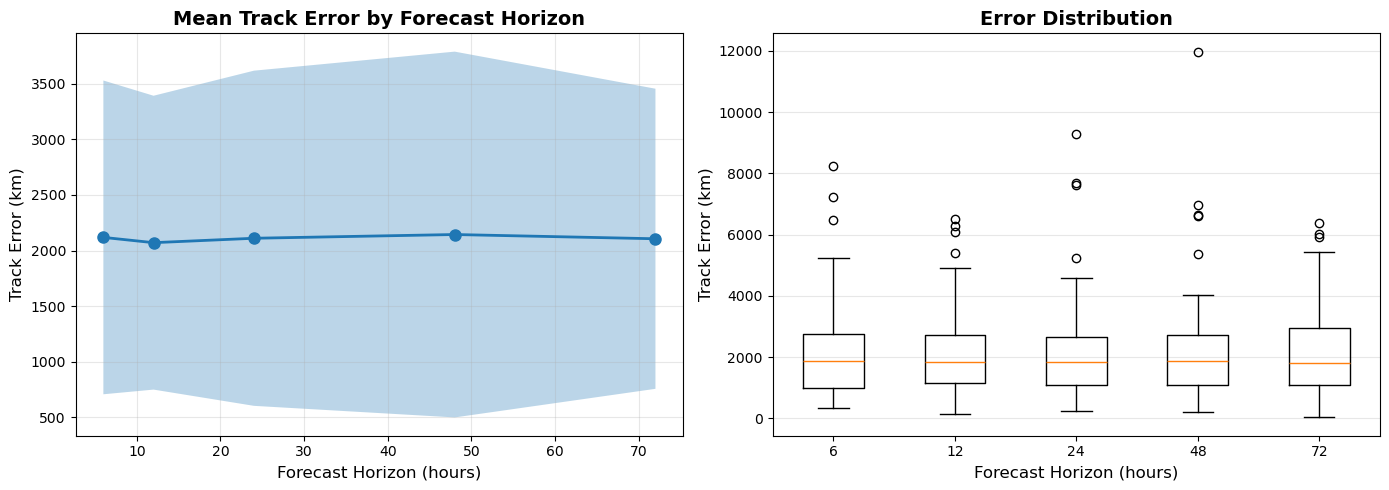

/opt/anaconda3/envs/tc-env/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/anaconda3/envs/tc-env/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/anaconda3/envs/tc-env/lib/python3.9/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/tc-env/lib/python3.9/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/tc-env/lib/python3.9/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **k

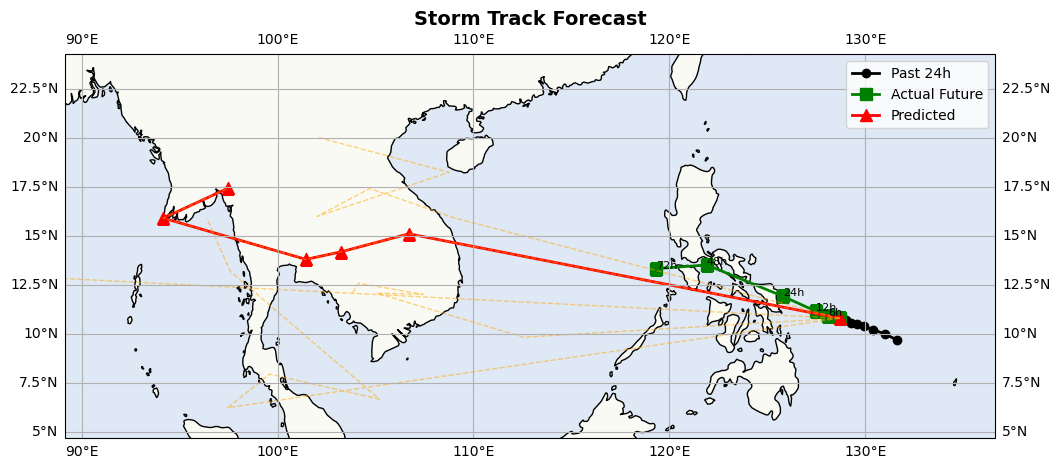

/opt/anaconda3/envs/tc-env/lib/python3.9/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


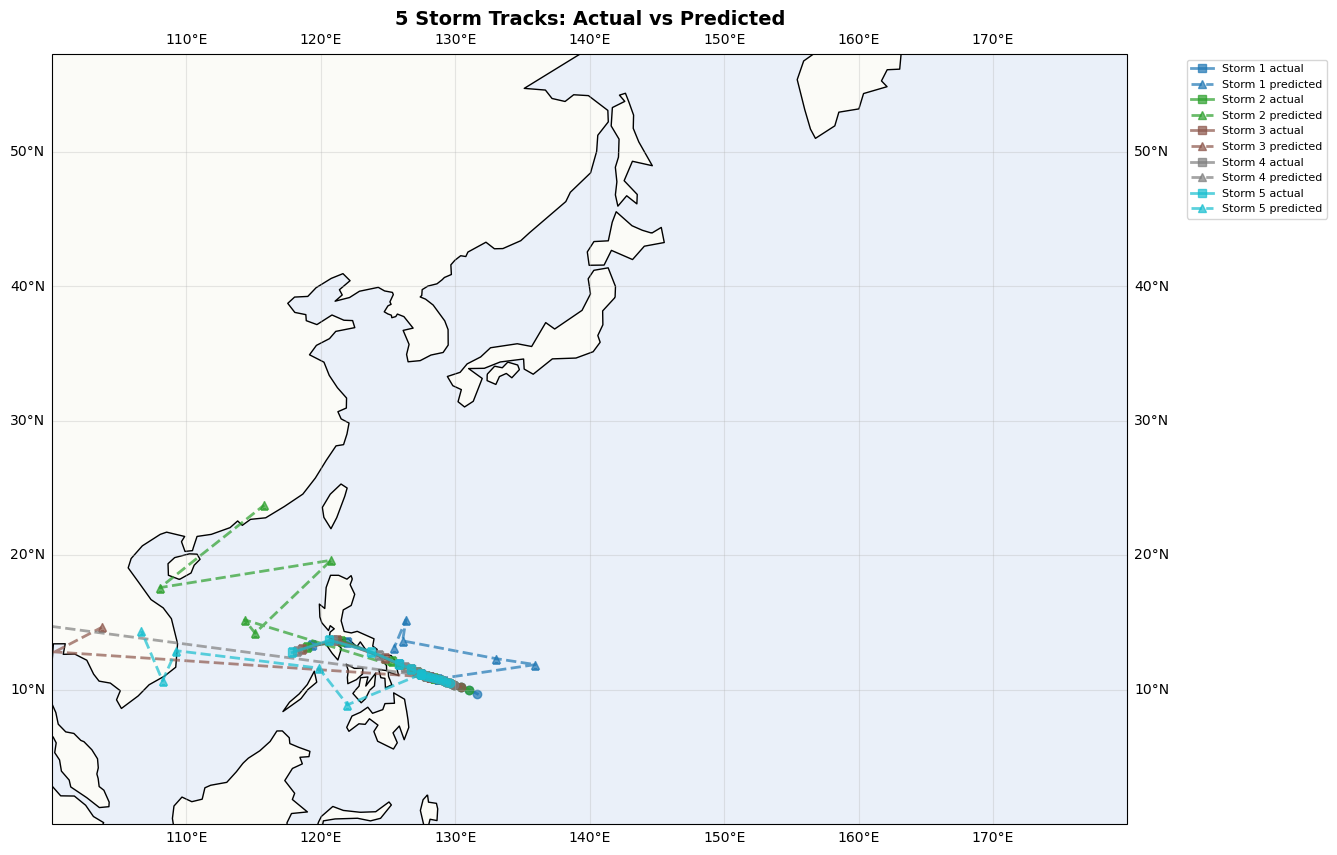

In [22]:
# Load model
checkpoint = torch.load('checkpoint_epoch_50.pt')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# 1. Evaluate on test set
errors = evaluate_model(model, diffusion, dataset, device, n_samples=100)

# 2. Plot error distribution
plot_error_distribution(errors)

# 3. Visualize single storm with ensemble
sample = dataset[0]
traj, era5, actual = sample

# Generate ensemble
ensemble = []
for _ in range(5):
    with torch.no_grad():
        pred = diffusion.sample(model, traj.unsqueeze(0).to(device), 
                               era5.unsqueeze(0).to(device), device)
        ensemble.append(pred[0].cpu().numpy())

plot_single_track(sample, ensemble[0], ensemble_preds=ensemble, 
                 save_path='single_storm_ensemble.png')

# 4. Plot multiple storms
plot_multiple_storms(model, diffusion, dataset, device, n_storms=5)

## Diagnostic Tests

In [23]:
# Test 1: Does the model use the past trajectory?
sample = dataset[0]
traj, era5, actual = sample

# Normal prediction
with torch.no_grad():
    normal_pred = diffusion.sample(model, traj.unsqueeze(0).to(device), 
                                   era5.unsqueeze(0).to(device), device)[0]

# Prediction with RANDOM past trajectory (nonsense input)
random_traj = torch.randn_like(traj) * 50  # Completely random locations
with torch.no_grad():
    random_pred = diffusion.sample(model, random_traj.unsqueeze(0).to(device),
                                  era5.unsqueeze(0).to(device), device)[0]

print("With real trajectory:")
print(normal_pred)
print("\nWith random nonsense trajectory:")
print(random_pred)
print("\nAre they similar? If yes, the model isn't using the trajectory!")

With real trajectory:
tensor([[ 12.5392, 103.7913],
        [ 10.4436, 102.8465],
        [ 11.8575, 101.4444],
        [ 13.3837,  94.9377],
        [ 11.0874,  91.7307]])

With random nonsense trajectory:
tensor([[ 11.7752, 129.1490],
        [ 15.0797, 134.0467],
        [ 11.8928, 127.7361],
        [ 14.1438, 120.1215],
        [ 18.2448, 131.3734]])

Are they similar? If yes, the model isn't using the trajectory!


#### Clearly underfitting. 